# Results:     
    accuracy: 0.9951 
    loss: 0.0161  
    val_loss: 0.0728 
    val_accuracy: 0.9811
    ********************

## Importing Data

In [1]:
import tensorflow as tf
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from matplotlib import pyplot

(trainData, trainLabels), (testData, testLabels) = mnist.load_data()

print(trainData.shape)
print(trainLabels.shape)

(60000, 28, 28)
(60000,)


In [2]:
print(trainLabels)

[5 0 4 ... 5 6 8]


In [3]:
# print(testData[0])

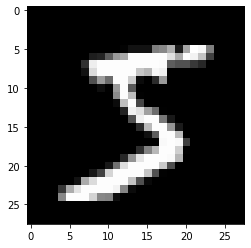

In [4]:
pyplot.imshow(trainData[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [5]:
trainData = trainData / 255.0

testData = testData / 255.0

## Creating A Model

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(trainData, trainLabels, epochs=10,
                    validation_data=(testData, testLabels))

Epoch 1/10


c:\python39\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1875/1875 [==============================] - 2s 916us/step - loss: 0.2614 - accuracy: 0.9252 - val_loss: 0.1421 - val_accuracy: 0.9581
Epoch 2/10
1875/1875 [==============================] - 1s 699us/step - loss: 0.1175 - accuracy: 0.9645 - val_loss: 0.1040 - val_accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 1s 703us/step - loss: 0.0811 - accuracy: 0.9754 - val_loss: 0.0828 - val_accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 1s 694us/step - loss: 0.0602 - accuracy: 0.9820 - val_loss: 0.0846 - val_accuracy: 0.9728
Epoch 5/10
1875/1875 [==============================] - 1s 705us/step - loss: 0.0467 - accuracy: 0.9852 - val_loss: 0.0727 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 1s 700us/step - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.0741 - val_accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 1s 730us/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0735 - val_accura

In [8]:
test_loss, test_acc = model.evaluate(testData,  testLabels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 457us/step - loss: 0.0728 - accuracy: 0.9811
Test accuracy: 0.9811000227928162


In [9]:
# epoch = accuracy
#     1: 0.979
#     2: 0.977
#     3: 0.979
#     4: 0.978
#     5: 0.976
#     8: 0.978
#     10: 0.9812999963760376
#     30: 0.977
#     28: 0.970

Enter a number and get the prediction corresponding to the number: 7880
Expected output:  6
Actual output:  6


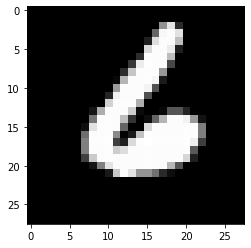

Enter a number and get the prediction corresponding to the number: 5652
Expected output:  0
Actual output:  0


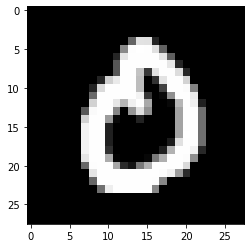

Enter a number and get the prediction corresponding to the number: 90
Expected output:  3
Actual output:  3


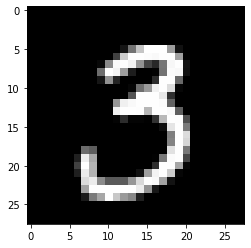

Enter a number and get the prediction corresponding to the number: 213
Expected output:  3
Actual output:  3


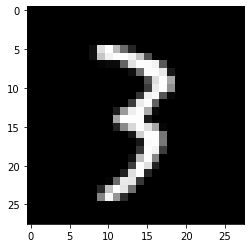

In [ ]:
while True:
    i = int(input("Enter a number and get the prediction corresponding to the number: "))
    predictions = model.predict(testData)
    print("Expected output: ", testLabels[i])
    print("Actual output: ", np.argmax(predictions[i]))
    pyplot.imshow(testData[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()